### 데이터셋 설명
    1. use_log.csv : 센터의 이용경력
    2. customer_master.csv : 말 시점의 회원 데이터
    3. class_master.csv : 회원 구분 (종일/주간/야간)
    4. campaign_master.csv : 행사 구분 데이터

In [79]:
import pandas as pd
uselog = pd.read_csv('use_log.csv')
uselog.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [80]:
customer = pd.read_csv('customer_master.csv')
customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [81]:
class_master = pd.read_csv('class_master.csv')
class_master.head()

,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


In [82]:
campaign_master = pd.read_csv('campaign_master.csv')
campaign_master.head()

,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


In [83]:
customer_join = pd.merge(left=customer,
                         right=class_master,
                         left_on='class',
                         right_on='class',
                         how='left')
customer_join = pd.merge(left=customer_join,
                         right=campaign_master,
                         left_on='campaign_id',
                         right_on='campaign_id',
                         how='left')
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [84]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

In [85]:
customer_join.value_counts('campaign_name')

campaign_name
2_일반         3050
0_입회비반액할인     650
1_입회비무료       492
Name: count, dtype: int64

In [86]:
customer_join.value_counts('class_name')

class_name
0_종일    2045
2_야간    1128
1_주간    1019
Name: count, dtype: int64

In [87]:
customer_join.value_counts('gender')

gender
M    2209
F    1983
Name: count, dtype: int64

In [88]:
customer_join.value_counts('is_deleted')

is_deleted
0    2842
1    1350
Name: count, dtype: int64

In [89]:
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [90]:
customer_join['start_date'] = pd.to_datetime(customer_join['start_date'])
customer_start = customer_join['start_date'] > pd.to_datetime('20180401')
print(len(customer_join[customer_start]))

1361


In [91]:
len(customer_join.loc[(customer_join['is_deleted']==1)&(customer_join['gender']=='F'), 'customer_id'])

631

In [92]:
customer_join['end_date'] = pd.to_datetime(customer_join['end_date'])
customer_newer = customer_join.loc[(customer_join['end_date'] >= pd.to_datetime('20190331')) | (customer_join['end_date'].isna())]
customer_newer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반


In [93]:
len(customer_newer)

2953

In [94]:
customer_newer.value_counts('class_name')

class_name
0_종일    1444
2_야간     813
1_주간     696
Name: count, dtype: int64

In [95]:
customer_newer.value_counts('gender')

gender
M    1553
F    1400
Name: count, dtype: int64

In [26]:
uselog.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [34]:
uselog['usedate'] = pd.to_datetime(uselog['usedate'])
uselog['연월'] = uselog['usedate'].dt.strftime('%Y%m')
uselog_months = uselog.groupby(['연월', 'customer_id'],
                              as_index=False).count()
uselog_months.rename(columns={'log_id':'counts'}, inplace=True)
uselog_months

,연월,customer_id,counts,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3
3,201804,AS015315,6,6
4,201804,AS015739,7,7
...,...,...,...,...
36837,201903,TS995853,8,8
36838,201903,TS998593,8,8
36839,201903,TS999079,3,3
36840,201903,TS999231,6,6


In [35]:
del uselog_months['usedate']
uselog_months.head()

,연월,customer_id,counts
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [65]:
uselog_customers = uselog_months.groupby('customer_id')['counts'].agg(['mean', 'median', 'max'])
uselog_customers

,mean,median,max
customer_id,,,
AS002855,4.500000,5.0,7
AS008805,4.000000,4.0,8
AS009013,2.000000,2.0,2
AS009373,5.083333,5.0,7
AS015233,7.545455,7.0,11
...,...,...,...
TS995853,9.500000,9.5,11
TS998593,8.142857,8.0,9
TS999079,4.916667,5.5,9


In [66]:
uselog['weekday'] = uselog['usedate'].dt.weekday

In [67]:
uselog

,log_id,customer_id,usedate,연월,weekday
0,L00000049012330,AS009373,2018-04-01,201804,6
1,L00000049012331,AS015315,2018-04-01,201804,6
2,L00000049012332,AS040841,2018-04-01,201804,6
3,L00000049012333,AS046594,2018-04-01,201804,6
4,L00000049012334,AS073285,2018-04-01,201804,6
...,...,...,...,...,...
197423,L00000049209753,TS977703,2019-03-31,201903,6
197424,L00000049209754,TS979550,2019-03-31,201903,6
197425,L00000049209755,TS995299,2019-03-31,201903,6
197426,L00000049209756,TS995853,2019-03-31,201903,6


In [71]:
uselog_weekday = uselog.groupby(['customer_id', '연월', 'weekday'],as_index=False).count()[['customer_id', '연월', 'weekday', 'log_id']]
uselog_weekday.rename(columns={'log_id':'counts'}, inplace=True)
uselog_weekday

,customer_id,연월,weekday,counts
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1
...,...,...,...,...
93328,TS999855,201901,1,1
93329,TS999855,201901,5,4
93330,TS999855,201901,6,1
93331,TS999855,201902,5,4


In [76]:
uselog_weekday = uselog_weekday.groupby('customer_id', as_index=False).max()[['customer_id', 'counts']]
uselog_weekday['routine_flg'] = 0
# where은 해당 변수가 4 미만이면 그대로 두고, 이상이면 1로 바꾼다
uselog_weekday['routine_flg'] = uselog_weekday['routine_flg'].where(uselog_weekday['counts']<4, 1)
uselog_weekday.head()

,customer_id,counts,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


In [77]:
uselog_customers

,mean,median,max
customer_id,,,
AS002855,4.500000,5.0,7
AS008805,4.000000,4.0,8
AS009013,2.000000,2.0,2
AS009373,5.083333,5.0,7
AS015233,7.545455,7.0,11
...,...,...,...
TS995853,9.500000,9.5,11
TS998593,8.142857,8.0,9
TS999079,4.916667,5.5,9


In [97]:
customer_join = pd.merge(customer_join,
                         uselog_customers,
                         on='customer_id',
                         how='left')
customer_join = pd.merge(customer_join,
                         uselog_weekday[['customer_id', 'routine_flg']],
                         on='customer_id',
                         how='left')
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1


In [99]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
routine_flg         0
dtype: int64

In [100]:
customer_join['calc_date'] = customer_join['end_date']
customer_join['calc_date'] = customer_join['calc_date'].fillna(pd.to_datetime('20190430'))
customer_join['mermbership_period'] = 0

In [101]:
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,routine_flg,calc_date,mermbership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,1,2019-04-30,0
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,1,2019-04-30,0
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,1,2019-04-30,0
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,1,2019-04-30,0
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,2019-04-30,0


In [113]:
from dateutil.relativedelta import relativedelta
for i in range(len(customer_join)):
    delta = relativedelta(customer_join['calc_date'].iloc[i], customer_join['start_date'].iloc[i])
    customer_join['membership_period'].iloc[i] = delta.years*12+delta.months
customer_join.head()

C:\Users\user\AppData\Local\Temp\ipykernel_17828\3329892483.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_join['membership_period'].iloc[i] = delta.years*12+delta.months
C:\Users\user\AppData\Local\Temp\ipykernel_17828\3329892483.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '47' has dtype incompatible with timedelta64[ns], please explicitly cast to a compatible dtype first.
  customer_join['membership_period'].iloc[i] = delta.years*12+delta.months


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,routine_flg,calc_date,mermbership_period,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,1,2019-04-30,0,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,1,2019-04-30,0,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,1,2019-04-30,0,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,1,2019-04-30,0,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,2019-04-30,0,47


In [114]:
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,routine_flg,calc_date,mermbership_period,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,1,2019-04-30,0,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,1,2019-04-30,0,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,1,2019-04-30,0,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,1,2019-04-30,0,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,2019-04-30,0,47


In [115]:
customer_join['membership_period'].unique()

array([47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 23, 35, 34, 33, 21,
       22, 32, 20, 31, 19, 18, 30, 29, 17, 28, 16, 27, 15, 26, 25, 13, 24,
       12, 11, 10, 14, 9, 8, 7, 6, 5, 4, 3, 2, 1], dtype=object)

In [116]:
customer_join.describe()[['mean', 'median', 'max']]

,mean,median,max
count,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950
min,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000
50%,5.000000,5.000000,8.000000
75%,6.416667,6.500000,9.000000
max,12.000000,12.000000,14.000000
std,1.777533,1.874874,2.168959


(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

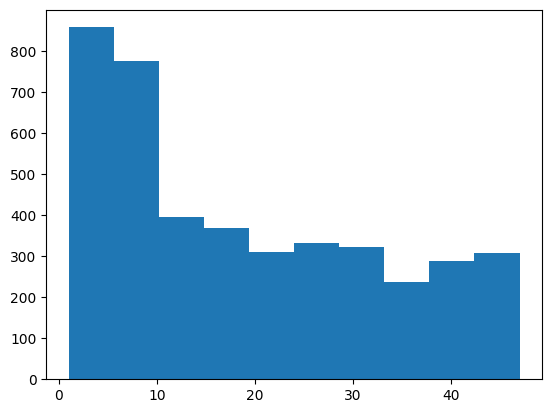

In [117]:
import matplotlib.pyplot as plt
plt.hist(customer_join['membership_period'])

In [112]:
customer_join['membership_period']

0      1460 days
1      1460 days
2      1460 days
3      1460 days
4      1460 days
          ...   
4187     47 days
4188     47 days
4189     47 days
4190     47 days
4191     46 days
Name: membership_period, Length: 4192, dtype: timedelta64[ns]

In [118]:
customer_end = customer_join.loc[customer_join['is_deleted']==1]
customer_end.describe()

,start_date,end_date,is_deleted,price,mean,median,max,routine_flg,calc_date,mermbership_period
count,1350,1350,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350,1350.0
mean,2018-01-20 10:45:20,2018-10-17 16:23:28,1.0,8595.555556,3.865474,3.621852,6.461481,0.456296,2018-10-17 16:23:28,0.0
min,2016-05-01 00:00:00,2018-04-30 00:00:00,1.0,6000.000000,1.000000,1.000000,1.000000,0.000000,2018-04-30 00:00:00,0.0
25%,2017-10-01 00:00:00,2018-06-30 00:00:00,1.0,6000.000000,3.000000,3.000000,4.000000,0.000000,2018-06-30 00:00:00,0.0
50%,2018-03-01 00:00:00,2018-10-31 00:00:00,1.0,7500.000000,4.000000,4.000000,7.000000,0.000000,2018-10-31 00:00:00,0.0
75%,2018-06-03 00:00:00,2019-01-31 00:00:00,1.0,10500.000000,4.666667,4.500000,8.000000,1.000000,2019-01-31 00:00:00,0.0
max,2019-02-11 00:00:00,2019-03-31 00:00:00,1.0,10500.000000,9.000000,9.000000,13.000000,1.000000,2019-03-31 00:00:00,0.0
std,NaN,NaN,0.0,1949.163652,1.246385,1.270847,2.584021,0.498271,NaN,0.0


In [119]:
customer_stay = customer_join.loc[customer_join['is_deleted']==0]
customer_stay.describe()

,start_date,end_date,is_deleted,price,mean,median,max,routine_flg,calc_date,mermbership_period
count,2842,0,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842,2842.0
mean,2017-04-03 22:42:28.627726848,NaT,0.0,8542.927516,6.030288,6.024279,8.471147,0.984166,2019-04-30 00:00:00,0.0
min,2015-05-01 00:00:00,NaT,0.0,6000.000000,3.166667,3.000000,5.000000,0.000000,2019-04-30 00:00:00,0.0
25%,2016-05-01 00:00:00,NaT,0.0,6000.000000,4.833333,5.000000,7.000000,1.000000,2019-04-30 00:00:00,0.0
50%,2017-04-01 00:00:00,NaT,0.0,7500.000000,5.583333,5.500000,8.000000,1.000000,2019-04-30 00:00:00,0.0
75%,2018-04-05 00:00:00,NaT,0.0,10500.000000,7.178030,7.000000,10.000000,1.000000,2019-04-30 00:00:00,0.0
max,2019-03-15 00:00:00,NaT,0.0,10500.000000,12.000000,12.000000,14.000000,1.000000,2019-04-30 00:00:00,0.0
std,NaN,NaN,0.0,1977.189779,1.553587,1.599765,1.571048,0.124855,NaN,0.0


In [121]:
customer_join.to_csv('customer_join.csv')